In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import hashlib
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Sample-Superstore.csv", encoding='latin-1')

In [3]:
print(df.isna().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [4]:
# Data Cleaning and Preparation
# Make sure to handle mixed date formats correctly
def parse_mixed_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%m/%d/%Y')  # Try MM/DD/YYYY first
    except ValueError:
        try:
            return pd.to_datetime(date_str, format='%d-%m-%Y')  # Try DD-MM-YYYY if MM/DD/YYYY fails
        except ValueError:
            return pd.NaT  # Return Not a Time if both fail

df['Order Date'] = df['Order Date'].apply(parse_mixed_date)
df['Ship Date'] = df['Ship Date'].apply(parse_mixed_date)

In [5]:
# df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed', dayfirst=True)
# df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='mixed', dayfirst=True)

In [6]:
# Data Cleaning and Preparation
# Assuming your date format is MM/DD/YYYY
# df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
# df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y') #apply also to the ship date.
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df.dropna(subset=['Sales', 'Profit', 'Quantity'], inplace=True)
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Quarter'] = df['Order Date'].dt.quarter
df['Shipping Time'] = (df['Ship Date'] - df['Order Date']).dt.days

# 1. Which product categories generate the most profit?

1. Product Categories Generating Most Profit:
 Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64


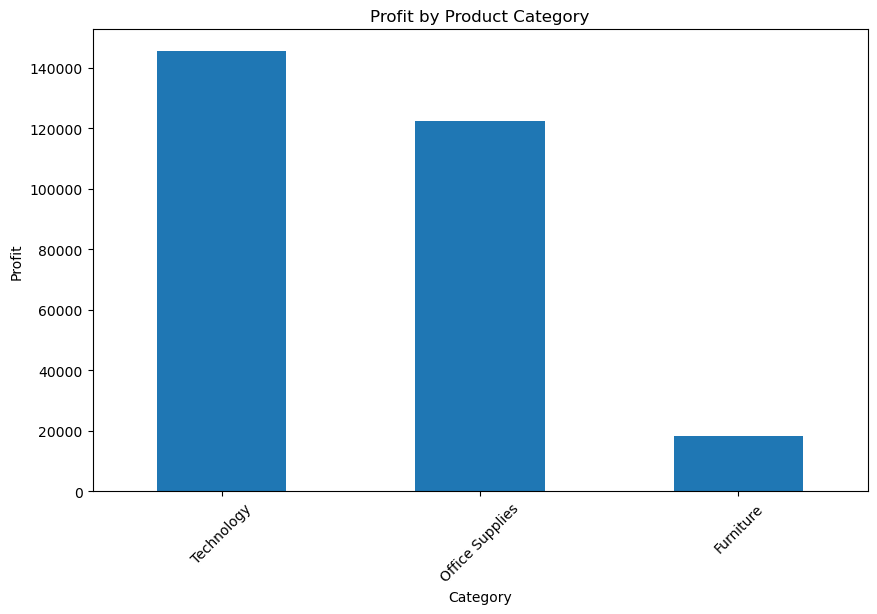

In [7]:
category_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
print("1. Product Categories Generating Most Profit:\n", category_profit)
plt.figure(figsize=(10, 6))
category_profit.plot(kind='bar')
plt.title('Profit by Product Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()

# Are sales higher during specific months or seasons?

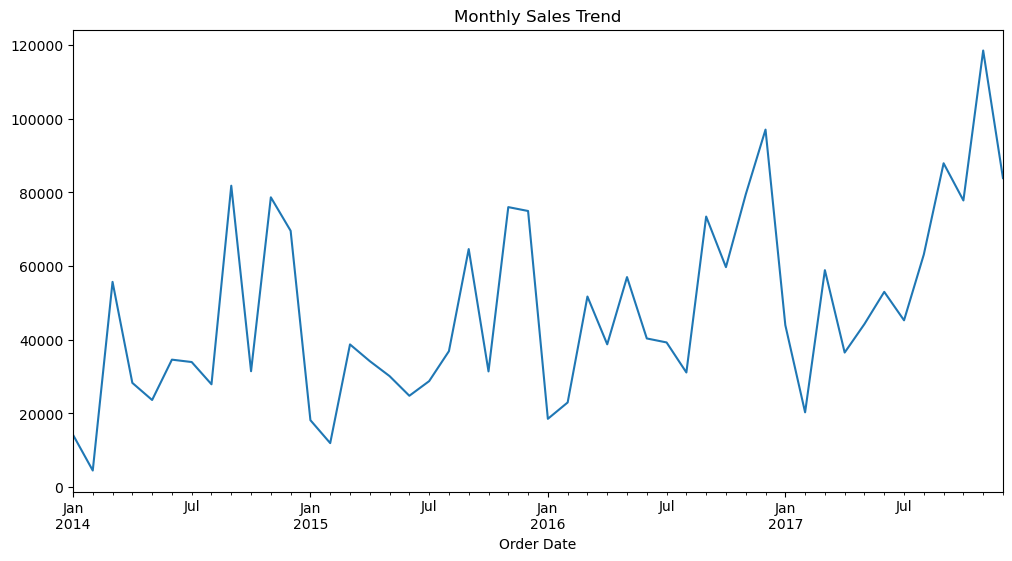

In [8]:
# Set "Order Date" as the index
df.set_index('Order Date', inplace=True)

# Resample and plot
monthly_sales = df['Sales'].resample('M').sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.show()

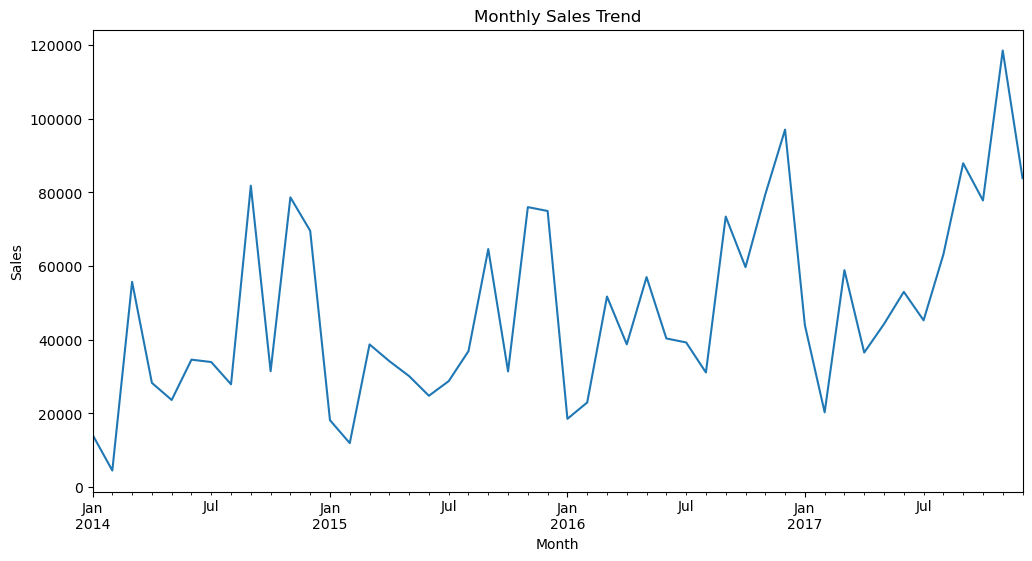

In [9]:
monthly_sales = df['Sales'].resample('M').sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()